# 웹 크롤링이란?
: 인터넷 상에 존재하는 데이터를 자동으로 수집하는 행위
- 데이터를 **탐색**하고,
- 원하는 조건에 맞는 데이터를 직접 **수집**하고,
- **저장**까지 하기 위한 목적으로 사용

<br>

1. 웹 페이지 정보 가져오기
  - Python Requests 라이브러리
2. HTML 소스를 파싱(분석)하여 원하는 정보 얻기
  - Python BeautifulSoup 라이브러리

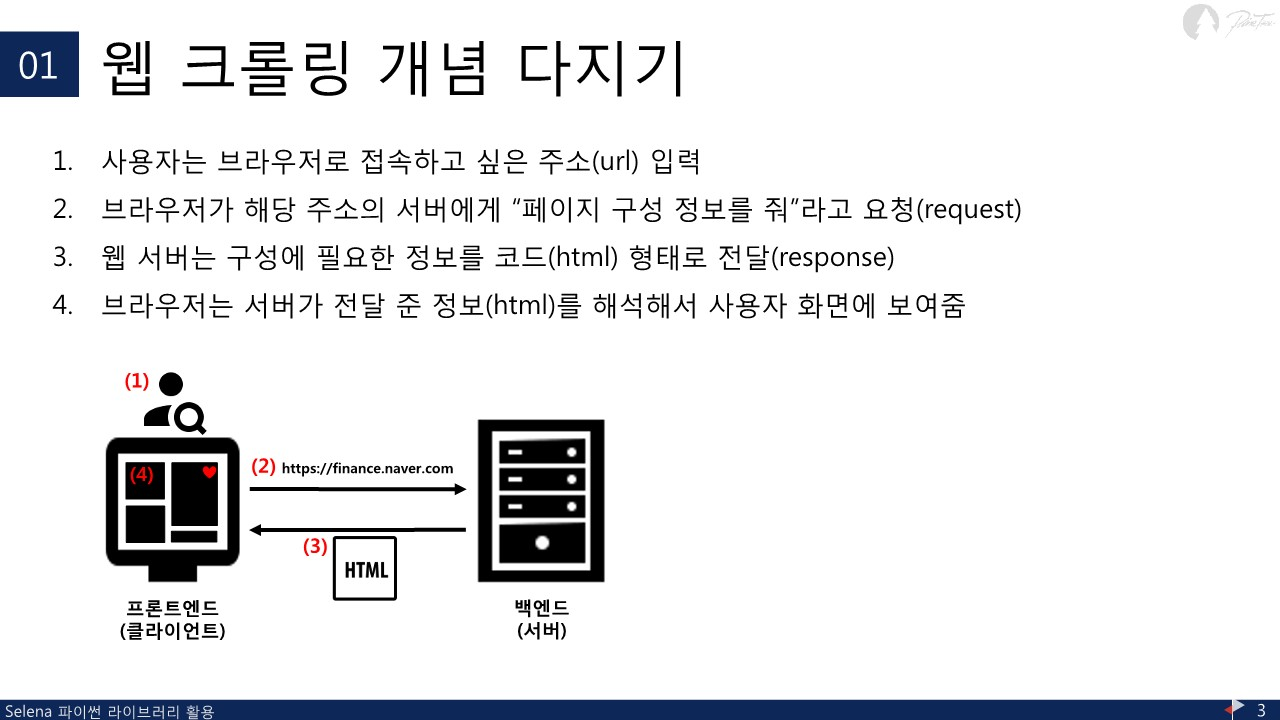

# BeautifulSoup : 웹 데이터 수집 라이브러리
- HTML 및 XML에서 데이터를 쉽게 처리하는 파이썬 라이브러리
- HTML은 태그로 이루어져 있고, 수많은 공백과 변화하는 소스들 때문에 오류가 있을 가능성이 높지만
- BeautifulSoup을 이용하면 이러한 오류를 잡아 고친 후 데이터를 전달해줌
- 참고 : [BeautifulSoup 공식 홈페이지](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [ ]:
# 설치
!pip install beautifulsoup4

In [ ]:
# 사용
from bs4 import BeautifulSoup

# HTML 코드 작성

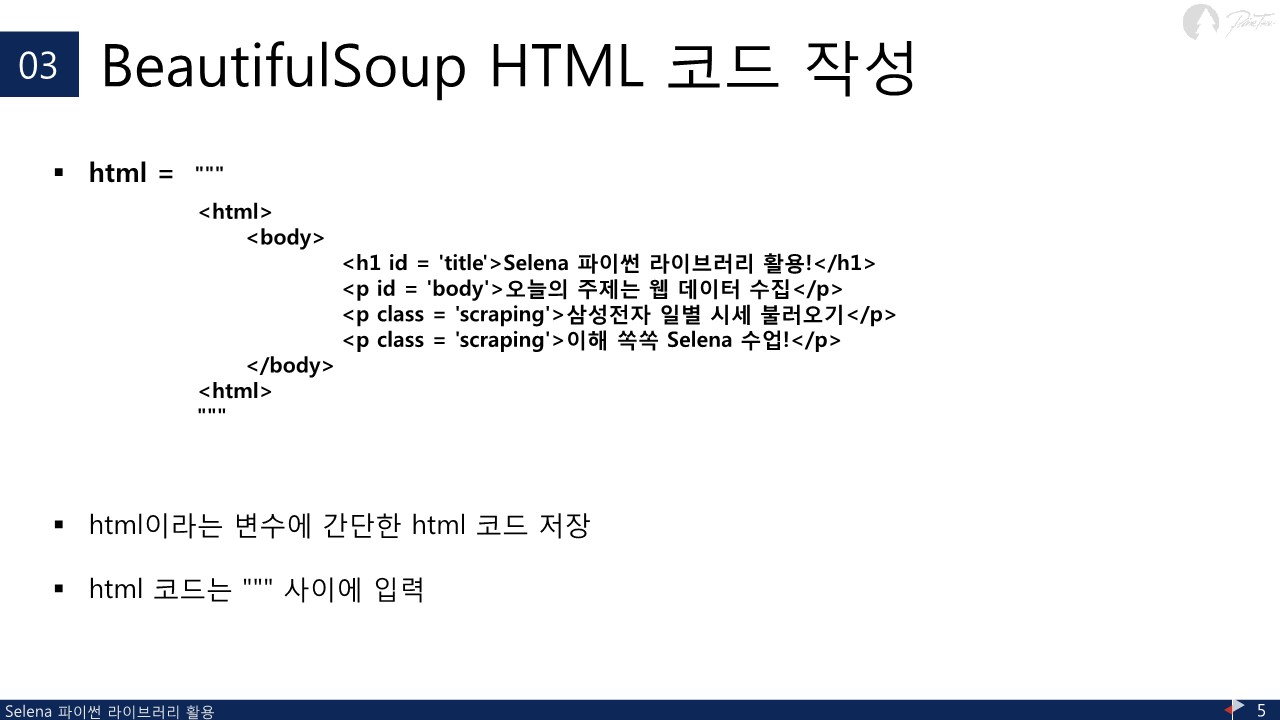

In [ ]:
# HTML 코드 작성해보기
html = """
<html>
  <body>
    <h1 id = "title">파이썬 라이브러리 활용</h1>
    <p id = "body">오늘의 주제는 웹 데이터 수집</p>
    <p class = "scraping">BeautifulSoup 라이브러리에 대해 배워보자!</p>
    <p class = "scraping">웹 크롤링을 위해 HTML 구조를 이해해보자!</p>
  </body>
</html>
"""

# HTML 파싱
- **soup = BeautifulSoup(html, 'html.parser')**
  - html을 파이썬에서 읽을 수 있게 파싱 (파이썬 객체로 변환)
  - html이라는 변수에 저장한 html 소스코드를 .parser를 붙여 반환
  - parser는 파이썬의 내장 메소드

In [ ]:
# BeautifulSoup 함수를 이용하여 soup 객체 생성
# html이라는 변수에 저장한 html 소스코드를 .parser를 붙여 변환
soup = BeautifulSoup(html, 'html.parser')

# 데이터를 덱스트로 변환
- **for text in soup: print(text)**
  - **soup** : soup의 데이터를 모두 가져와서 텍스트로 반환
  - **soup.contents** : soup의 데이터를 모두 가져와서 리스트로 반환
  - **soup.stripped_strings** : 공백도 함께 가져와서 텍스트로 반환

### soup
: soup의 데이터를 모두 가져와서 텍스트로 반환

In [ ]:
# soup
for text in soup:
    print(text)



<html>
<body>
<h1 id="title">파이썬 라이브러리 활용</h1>
<p id="body">오늘의 주제는 웹 데이터 수집</p>
<p class="scraping">BeautifulSoup 라이브러리에 대해 배워보자!</p>
<p class="scraping">웹 크롤링을 위해 HTML 구조를 이해해보자!</p>
</body>
</html>




### soup.contents
: soup의 데이터를 모두 가져와서 리스트로 반환

### soup.stripped_strings
: 공백도 함께 제거하여 텍스트로 반환

In [ ]:
# soup.stripped_strings
for stripped_text in soup.stripped_strings:
    print(stripped_text)

파이썬 라이브러리 활용
오늘의 주제는 웹 데이터 수집
BeautifulSoup 라이브러리에 대해 배워보자!
웹 크롤링을 위해 HTML 구조를 이해해보자!


# Find 함수
- **scraping = soup.find(class_='scraping')**<br>**scraping.string**

    - find 함수는 id, class, element 등을 검색
    - **find** : 조건에 해당하는 첫 번째 정보만 검색
        - 클래스 이름을 알 경우, class_ 형태로 사용
    - **find_all** : 조건에 해당하는 모든 정보 검색
    - **string** : 태그 내부의 텍스트만 출력

### find

In [ ]:
# id 값이 'title'인 조건에 해당하는 첫 번째 정보만 검색
title = soup.find(id='title')
print(title)

<h1 id="title">파이썬 라이브러리 활용</h1>


In [ ]:
# class 값이 'scraping'인 조건에 해당하는 첫 번째 정보만 검색
# 'class_ =' 형태로 사용
scraping = soup.find(class_ = "scraping")
print(scraping)

<p class="scraping">BeautifulSoup 라이브러리에 대해 배워보자!</p>


### find_all

In [ ]:
# class 값이 'scraping'인 조건에 해당하는 모든 정보 검색
scraping = soup.find_all(class_ = 'scraping')
print(scraping)

[<p class="scraping">BeautifulSoup 라이브러리에 대해 배워보자!</p>, <p class="scraping">웹 크롤링을 위해 HTML 구조를 이해해보자!</p>]


### string

In [ ]:
# 태그 내부의 텍스트만 출력
scraping.string

# 웹 크롤링 3단계 과정
1. **Request** : 웹 페이지의 URL을 이용해 HTML 문서를 요청
2. **Response** : 요쳥한 HTML 문서를 회신
3. **Parsing** : 태그 기반으로 파싱(일련의 문자열을 의미 있는 단위로 분해)

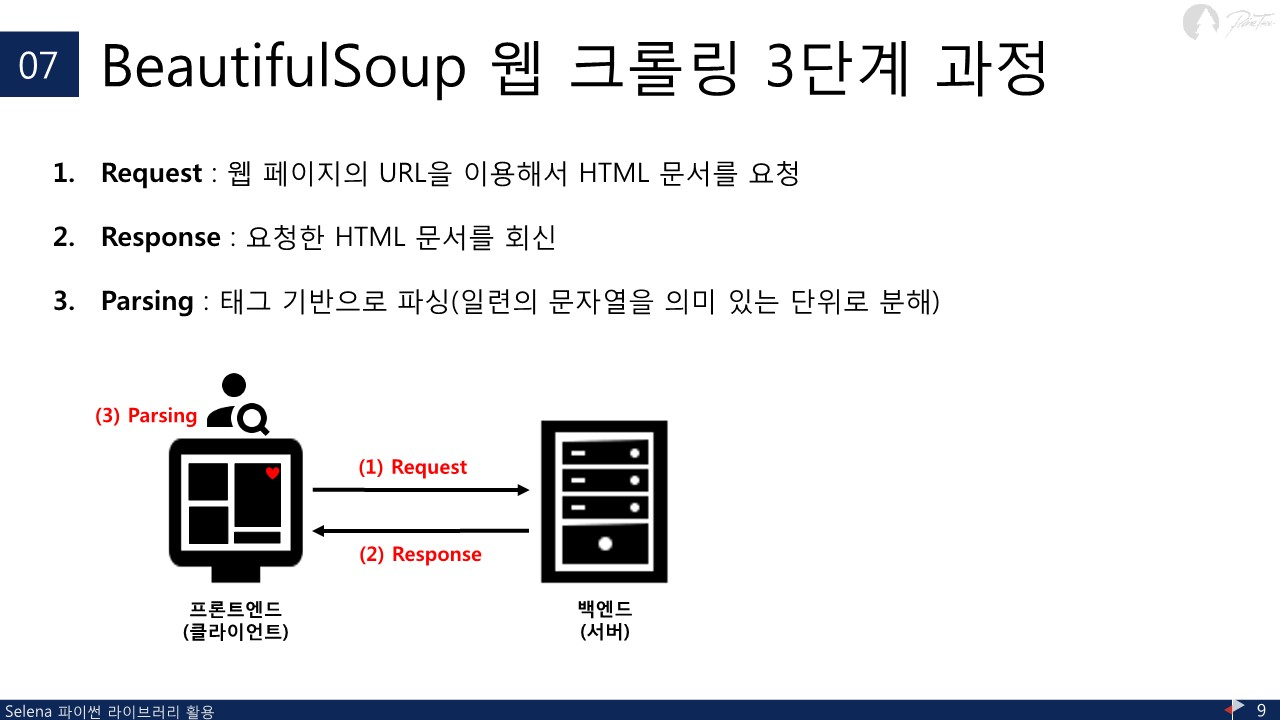

In [ ]:
# 웹 페이지의 URL을 이용해서 HTML 문서를 요청하기 위해 필요한 라이브러리
import requests

# F12(개발자 도구)로 URL 찾기
- 1) 네이버 금융 홈페이지 접속 : https://finance.naver.com/
- 2) 삼성전자(code : 005930) 검색
- 3) 시세 메뉴 클릭 후 URL 확인 : https://finance.naver.com/item/sise.naver?code=005930
- 4) 키보드 F12(개발자 도구) 클릭 > 메뉴 Elements 클릭 > 키보드 Ctrl과 F (검색 단축기) 클릭 > '일별 시세' 검색 > scr 값 복사

## URL 저장

In [ ]:
# stock_url 변수에 네이버 금융 사이트의 삼성전자 시세 정보가 담긴 URL 저장
stock_url = "https://finance.naver.com//item/sise_day.naver?code=005930"

## User-agent 설정
- user-agent 확인 사이트 : http://www.useragentstring.com/
- user-agent란, 웹 크롤링을 진행하면 종종 페이지에서 아무것도 받아오지 못하는 경우 발생! 이유는 대부분 서버에서 봇을 차단하기 때문
- 그래서 user-agent를 headers에 저장하면 오류를 해결할 수 있음

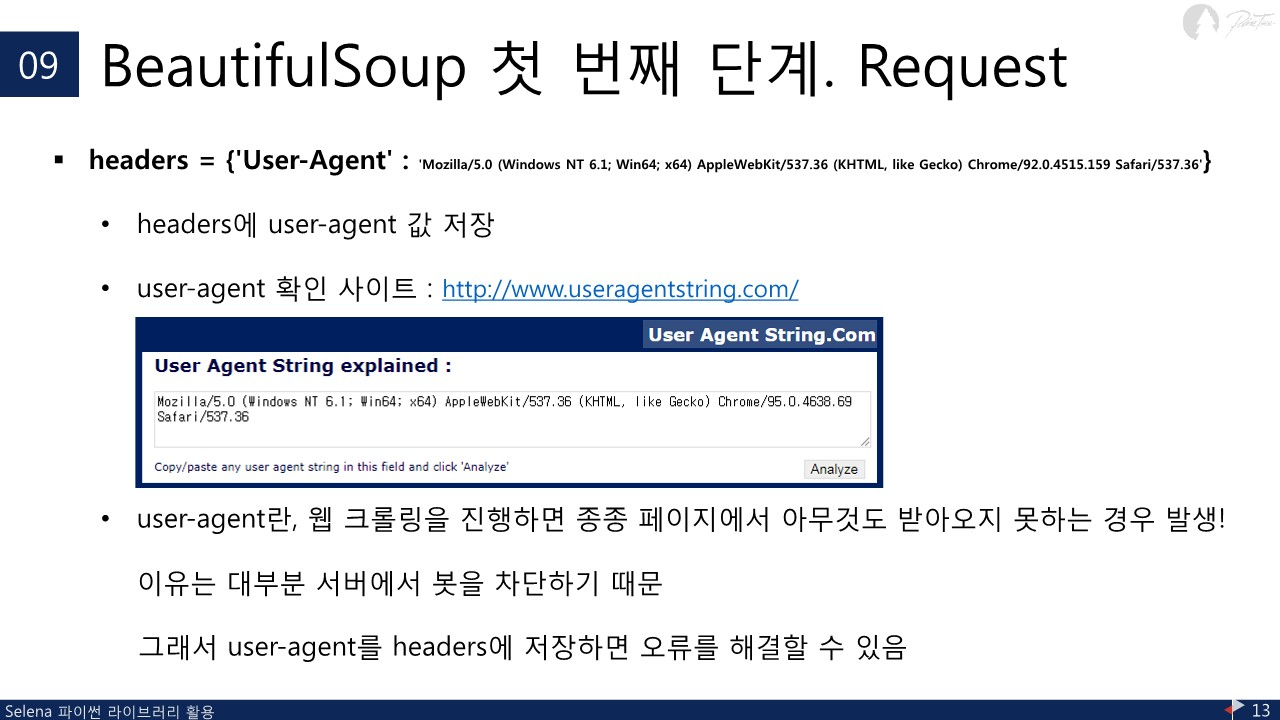

In [ ]:
# header에 user-agent 값 저장 (딕셔너리 형태)
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Whale/3.27.254.15 Safari/537.36"}

# 1단계. Request
- 웹 페이지의 URL 이용해서 HTML 문서를 요청
- **requests.get**(stock_url, headers = headers)
    - URL 값을 파라미터 값으로 입력
    - 해당 사이트는 반드시 헤더 정보를 요구하기 때문에, 파라미터 값으로 헤더 입력

In [ ]:
# requests.get 함수를 통해 URL를 이용해 HTML 문서를 요청
requests.get(stock_url, headers = headers)

<Response [200]>

# 2단계. Response
- 요청한 HTML 문서를 회신
- **response** = requests.get(stock_url, headers = headers)
    - 서버에서 요청을 받아 처리한 후, 요청자에게 응답 줌
    - HTML 코드 형태

In [ ]:
# response 변수에 요청한 HTML 문서를 회산하여 저장
response = requests.get(stock_url, headers = headers)

# 3단계. Parsing
- 태그 기반으로 파싱(일련의 문자열을 의미 있는 단위로 분해)
- soup = **BeautifulSoup**(response.text, 'html.parser')
    - html을 파이썬에서 읽을 수 있게 파싱(파이썬 객체로 변환)
    - response.text에 저장한 html 소스코드를 .parser를 붙여 변환
    - parser는 파이썬의 내장 메소드

In [ ]:
# soup 변수에 BeautifulSoup의 객체 생성
# HTML 코드를 파이썬에서 읽을 수 있도록 파싱
soup = BeautifulSoup(response.text, 'html.parser')

# 반복문으로 일별 종가 구현
- 200일 동안의 일별 종가 정보 가져오는 반복문 구현
- 코드 구조
    1. 200일 일별 종가 정보는 1페이지 당 10일의 일별 종가 정보 담겨있어서 **20페이지** 필요
    2. 일별 종가 담긴 URL과 Header 정보로 **requests.get 함수** 구현
    3. 요청한 HTML 문서를 회신하여 **response 변수**에 저장
    4. BeautifulSoup 함수를 HTML을 읽을 수 있도록 파싱하여 **soup 변수**에 저장
    5. 페이지 수만큼 20번 반복
        - **"tr" 태그 조건**에 해당하는 모든 정보를 검색하여 **parsing_list 변수**에 저장
    6. 1 페이지 당 10일의 일별 종가 정보 담겨있어서 10번 반복
        - **"td" 태그의 align가 "center"인 값들 중 0번째 조건**에 해당하는 정보 검색하여 출력
        - **"td" 태그의 class가 "num"인 값들 중 0번째 조건**에 해당하는 정보 검색하여 출력
        - 태그 정보는 F12(개발자 도구) 클릭하여 찾기

In [23]:
# 200일 동안의 일별 종가 정보 가져오는 반복문(1페이지 당 10일 정보 담겨있음)
for page in range(1, 21):
    print(str(page))

    # url + page 정보 합치기
    stock_url = 'http://finance.naver.com/item/sise_day.nhn?code=005930' + '&page=' + str(page)

    # Header 정보
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Whale/3.27.254.15 Safari/537.36"}

    # request : 웹 페이지의 URL, header 이용해서 HTML 문서 요청
    # response : 요청한 HTML 문서 회신
    reponse = requests.get(stock_url, headers = headers)

    # parsing : HTML을 읽을 수 있도록 파싱
    # soup 변수에 BeautifulSoup의 객체 생성
    soup = BeautifulSoup(response.text, 'html.parser')

    # "tr" 태그 조건에 해당하는 모든 정보 검색
    parsing_list = soup.find_all("tr")

    # None 값은 걸러주기 위한 변수 생성
    isCheckNone = None

    # 페이지 당 일별 종가 출력하기 위한 반복문 **들여쓰기 주의**
    for i in range(1, len(parsing_list)):
        # None 값은 걸러주기 위한 조건문 **들여쓰기 주의**
        # .span()는 배치된 문자열의 (시작, 끝)에 해당하는 튜플을 돌려주는 함수
        if(parsing_list[i].span != isCheckNone):
            # parsing_list[i] : i번째 parsing_list, i번째 "tr" 태그 값
            # .find_all("td", align="center")[0].text : "td" 태그의 align이 "center"인 값들 중 0번째 값
            # .find_all("td", class_="num")[0].text : "td" 태그의 class가 "num"인 값들 중 0번째 값
            print(parsing_list[i].find_all("td", align="center")[0].text,
                  parsing_list[i].find_all("td", class_='num')[0].text)

1
2024.08.14 77,200
2024.08.13 76,100
2024.08.12 75,500
2024.08.09 74,700
2024.08.08 73,400
2024.08.07 74,700
2024.08.06 72,500
2024.08.05 71,400
2024.08.02 79,600
2024.08.01 83,100
2
2024.08.14 77,200
2024.08.13 76,100
2024.08.12 75,500
2024.08.09 74,700
2024.08.08 73,400
2024.08.07 74,700
2024.08.06 72,500
2024.08.05 71,400
2024.08.02 79,600
2024.08.01 83,100
3
2024.08.14 77,200
2024.08.13 76,100
2024.08.12 75,500
2024.08.09 74,700
2024.08.08 73,400
2024.08.07 74,700
2024.08.06 72,500
2024.08.05 71,400
2024.08.02 79,600
2024.08.01 83,100
4
2024.08.14 77,200
2024.08.13 76,100
2024.08.12 75,500
2024.08.09 74,700
2024.08.08 73,400
2024.08.07 74,700
2024.08.06 72,500
2024.08.05 71,400
2024.08.02 79,600
2024.08.01 83,100
5
2024.08.14 77,200
2024.08.13 76,100
2024.08.12 75,500
2024.08.09 74,700
2024.08.08 73,400
2024.08.07 74,700
2024.08.06 72,500
2024.08.05 71,400
2024.08.02 79,600
2024.08.01 83,100
6
2024.08.14 77,200
2024.08.13 76,100
2024.08.12 75,500
2024.08.09 74,700
2024.08.08 73,40

# pandas 일별 시세 테이블 구현
1. pandas 라이브러리와 requests 라이브러리 이용
2. 200일 일별 종가 정보는 1페이지 당 10일의 일별 종가 정보 담겨있어서 **20페이지** 필요
3. 일별 종가 담긴 URL과 Header 정보로 **requests.get 함수** 구현
4. **pandas.read_html 함수**를 통해 HTML 불러와서 파싱
5. **append 함수**를 이용하여 리스트에 추가하고 싶은 요소를 추가하여 **concat 함수**로 df에 합치기
6. **dropna 함수**를 통해 결측 값 제거

In [28]:
# 네이버 금융 일별 시세 테이블 불러오기
# pandas 라이브러리와 requests 라이브러리 이용
# code = 회사코드, page = 일별 시세 테이블의 페이지 수 (200행의 데이터 불러오려면 20 페이지 입력)
import pandas as pd
import requests

df = pd.DataFrame()
df_list = []

for page in range(1, 20+1):
    stock_url = 'http://finance.naver.com/item/sise_day.nhn?code=005930' + '&page=' + str(page)

    # header 정보
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/126.0.0.0 Whale/3.27.254.15 Safari/537.36"}

    # requests : 웹 페이지의 URL, header 이용해서 HTML 문서 요청
    # response : 요청한 HTML 문서 회신
    response = requests.get(stock_url, headers = headers)

    # response.text로 응답을 주면 HTML 코드이기 때문에 read_html로 불러오기
    # append() : 리스트에 추가하고 싶은 요소를 추가
    df_list.append(pd.read_html(response.text, header=0)[0])

# concat() : dataframe에 리스트 합치기
df = pd.concat(df_list, ignore_index=True)

# 결측값 있는 행 제거
df = df.dropna()

# 데이터 확인
df

<ipython-input-28-c4369b95ece6>:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_list.append(pd.read_html(response.text, header=0)[0])
<ipython-input-28-c4369b95ece6>:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_list.append(pd.read_html(response.text, header=0)[0])
<ipython-input-28-c4369b95ece6>:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df_list.append(pd.read_html(response.text, header=0)[0])
<ipython-input-28-c4369b95ece6>:22: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  d

,날짜,종가,전일비,시가,고가,저가,거래량
1,2024.08.14,77200.0,"상승 1,100",77400.0,77800.0,77000.0,13105298.0
2,2024.08.13,76100.0,상승 600,76500.0,76600.0,75500.0,10716261.0
3,2024.08.12,75500.0,상승 800,75200.0,75900.0,74800.0,9839259.0
4,2024.08.09,74700.0,"상승 1,300",75700.0,75800.0,74200.0,16388222.0
5,2024.08.08,73400.0,"하락 1,300",73200.0,73900.0,72500.0,28414729.0
...,...,...,...,...,...,...,...
294,2023.10.31,66900.0,하락 400,67600.0,68300.0,66900.0,14488892.0
295,2023.10.30,67300.0,보합0,66800.0,67800.0,66700.0,10139270.0
296,2023.10.27,67300.0,상승 600,67100.0,67300.0,66700.0,11334726.0
297,2023.10.26,66700.0,"하락 1,300",67000.0,67900.0,66700.0,15517624.0
